<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-packages-and-define-colours" data-toc-modified-id="Import-packages-and-define-colours-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import packages and define colours</a></span></li><li><span><a href="#Data-structure-for-simulation-of-somatic-evolution:" data-toc-modified-id="Data-structure-for-simulation-of-somatic-evolution:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data structure for simulation of somatic evolution:</a></span></li><li><span><a href="#Functions-to-generate-fitnesses-from-a-DFE" data-toc-modified-id="Functions-to-generate-fitnesses-from-a-DFE-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functions to generate fitnesses from a DFE</a></span></li><li><span><a href="#Functions-for-simulating-the-evolutionary-dynamics" data-toc-modified-id="Functions-for-simulating-the-evolutionary-dynamics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions for simulating the evolutionary dynamics</a></span></li><li><span><a href="#Functions-for-plotting-Mueller-plots" data-toc-modified-id="Functions-for-plotting-Mueller-plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Functions for plotting Mueller plots</a></span></li><li><span><a href="#Performing-the-dynamics" data-toc-modified-id="Performing-the-dynamics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Performing the dynamics</a></span></li><li><span><a href="#Plotting-all-variant-trajectories-of-cases-and-controls-for-the-years-/-decades-preDx" data-toc-modified-id="Plotting-all-variant-trajectories-of-cases-and-controls-for-the-years-/-decades-preDx-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plotting all variant trajectories of cases and controls for the years / decades preDx</a></span></li><li><span><a href="#What-fraction-of-cases-have-single-or-doulbe-sweep-X-years-before?" data-toc-modified-id="What-fraction-of-cases-have-single-or-doulbe-sweep-X-years-before?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>What fraction of cases have single or doulbe sweep X years before?</a></span></li><li><span><a href="#Plot-distribution-of-VAFs-through-time-across-cases-and-control-for-50-years-preDx" data-toc-modified-id="Plot-distribution-of-VAFs-through-time-across-cases-and-control-for-50-years-preDx-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Plot distribution of VAFs through time across cases and control for 50 years preDx</a></span></li><li><span><a href="#Joint-frequency-distribution-as-way-of-identifying-early-large-double-mutants" data-toc-modified-id="Joint-frequency-distribution-as-way-of-identifying-early-large-double-mutants-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Joint frequency distribution as way of identifying early large double mutants</a></span></li><li><span><a href="#Occurence-time-distributions" data-toc-modified-id="Occurence-time-distributions-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Occurence time distributions</a></span></li><li><span><a href="#Categorizing-dynamics-for-highlighting-interesting-types-of-behaviour" data-toc-modified-id="Categorizing-dynamics-for-highlighting-interesting-types-of-behaviour-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Categorizing dynamics for highlighting interesting types of behaviour</a></span></li><li><span><a href="#Epidimiological-AML-info" data-toc-modified-id="Epidimiological-AML-info-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Epidimiological AML info</a></span></li></ul></div>

# Import packages and define colours

In [1]:
# imported packages
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import math
import matplotlib.ticker as plticker
from matplotlib.backends.backend_pdf import PdfPages
import bisect
import copy
import json
import csv
import ast
import bisect
# from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
import time
import os
import scipy.integrate as integrate
import pandas as pd
from pymuller import muller

# Lists of colors for plots

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8, c10, c14, c12]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

# Lists of colors for plots

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [   
(99,99,99),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178, 214),
(106,61,154),
(166,206,227),    
(31,120,180),  
(189,189,189),
]))

#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'
yellow = '#ffffd4'


#define the colors from colorbrewer2

b0 = '#3182bd'
b1 = '#4292c6'
b2 = '#6baed6'
b3 = '#9ecae1'
b4 = '#c6dbef'

g0 = '#238b45'
g1 = '#74c476'
g2 = '#a1d99b'
g3 = '#c7e9c0'
g4 = '#e5f5e0'

y0 = '#fd8d3c'
y1 = '#feb24c'
y2 = '#fed976'
y3 = '#ffeda0'
y4 = '#ffffcc'


r0 = '#cb181d'
r1 = '#ef3b2c'
r2 = '#fb6a4a'
r3 = '#fc9272'
r4 = '#fcbba1'

wt_grey='#cccccc'



zeroth_mutant_colors=[wt_grey]
single_mutant_colors=[b1]
double_mutant_colors=[g1]
triple_mutant_colors=[y1]
quadruple_mutant_colors=[r1]

multiple_mutant_colors=[zeroth_mutant_colors, \
                        single_mutant_colors, \
                        double_mutant_colors, \
                        triple_mutant_colors, \
                        quadruple_mutant_colors]

# Data structure for simulation of somatic evolution:

Object that gets dynamically updated is a dictionary `clones`

The keys of this dictionary are unique integer identifiers (which is counts the number of mutations that have occured in the population until that point). The values associated with the keys in `clones` is another dictionary with keys:

+ `clone_size_trajectory`  - an array of length `T` (typically 1000) of clone size over time 
+ `current_clone_size` - integer of current clone size in population
+ `mutations`  - a dictionary of `{mut_id:fitness, }`
+ `parent` - integer ID of parent clone
+ `children` - integer IDs of all children clones
+ `fitness` - real number decribing net birth rate

# Functions to generate fitnesses from a DFE

In [2]:
# returns the cumulative integrate for stretched exponential of form exp(-(s/sb)**p)
def cumulative_function(target_s, p, sb):
        
    continuous_DFE = lambda s: np.exp(-(s/sb)**p)
    s_lim=10*sb
    normalization = integrate.quad(continuous_DFE, 0.0, s_lim)[0]
    cumulative = integrate.quad(continuous_DFE, 0.0, target_s)[0]
    
    return cumulative/normalization

#returns a discrete mapping (dictionary) between cumulative and fitness
def mutation_fitness_generator(p, sb):
    number_of_quantiles=1000 # discretize the cumulative for efficient sampling
    mutation_fitness_generator_dict={}
    s_lim=10*sb
    
    previous_nearest_quantile_integer=0
    for target_s in np.linspace(0,s_lim,1001):
        normalized_cumulative = cumulative_function(target_s, p, sb)
        current_nearest_quantile_integer=int(np.round(normalized_cumulative*number_of_quantiles))
        
        for quantile_integer in range(previous_nearest_quantile_integer, current_nearest_quantile_integer):
            mutation_fitness_generator_dict[quantile_integer]=target_s
            
        previous_nearest_quantile_integer=current_nearest_quantile_integer
        if current_nearest_quantile_integer==number_of_quantiles:
            mutation_fitness_generator_dict[current_nearest_quantile_integer]=target_s
            break
    
    return mutation_fitness_generator_dict

#samples the discrete cumulative DFE to generate a random fitness from DFE
def random_mut_fit_generator(mutation_fitness_generator):
    number_quants=len(mutation_fitness_generator)-1
    eta=random.random()
    index=int(np.round(eta*number_quants))
    fitness=mutation_fitness_generator[index]
    return fitness

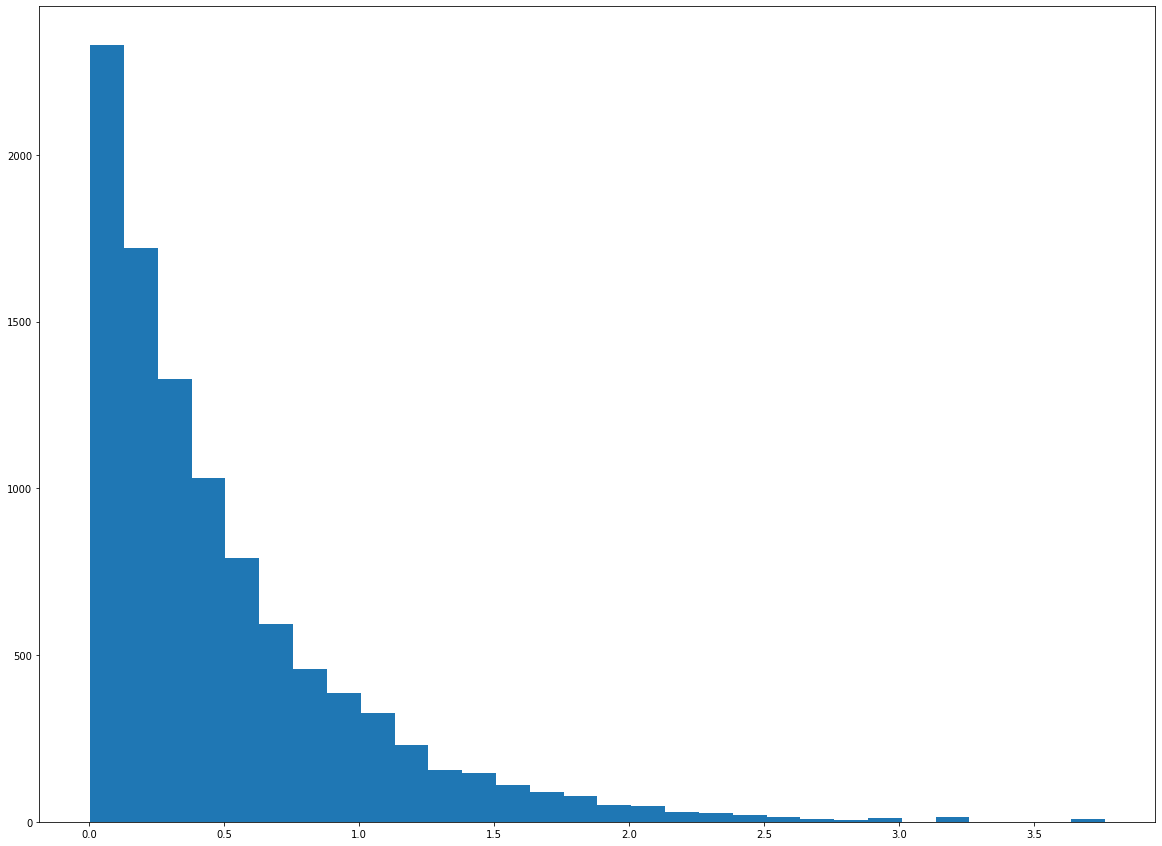

In [3]:
#check its doing something sensible
single_DFE=mutation_fitness_generator(1, 0.5)

example_fitnesses=[]
for i in range(10000):
    generated_fitness=random_mut_fit_generator(single_DFE)
    example_fitnesses.append(generated_fitness)
    
plt.close('all')
fig, axes = plt.subplots(1, 1, figsize = (20, 15))
plt.subplots_adjust(hspace=0.3)

axes.hist(example_fitnesses, bins=30);

# Functions for simulating the evolutionary dynamics

In [4]:
def mutate_population(clones, last_mutation_dict, mut_rate, DFEs, t, dt, T):
    
    mutation_counter=last_mutation_dict['last_mutation']
    
    clones_copy=copy.deepcopy(clones)
    
    for clone_id, clone_entry in clones_copy.items():
        
        size=clone_entry['current_clone_size']
        mutations=clone_entry['mutations']
        number_muts_in_clone=len(mutations)
        
        if number_muts_in_clone<4 and size>0:
            expected_children=size*mut_rate*dt
            number_of_children=np.random.poisson(expected_children)
            DFE=DFEs[number_muts_in_clone]
        else:
            number_of_children=0
        
        for new_child in range(number_of_children):
            
            mutation_counter+=1
            child_id=mutation_counter
            new_mutation_fitness=random_mut_fit_generator(DFE)
            
            clones[child_id]={}
            clones[child_id]['clone_size_trajectory']=np.zeros(T)
            clones[child_id]['clone_size_trajectory'][t]=1
            clones[child_id]['parent']=clone_id
            clones[child_id]['children']=[]
            clones[child_id]['aml_clone']=False
            clones[child_id]['current_clone_size']=1
            clones[child_id]['occurence_time']=t*dt
            clones[child_id]['mutations']=copy.deepcopy(mutations)
            clones[child_id]['mutations'][mutation_counter]=new_mutation_fitness
            clones[clone_id]['children'].append(child_id)
            
            total_clone_fitness=0.0
            for m, f in clones[child_id]['mutations'].items():
                total_clone_fitness=total_clone_fitness+f
            clones[child_id]['fitness']=total_clone_fitness      
            
    clones=clones_copy
    last_mutation_dict['last_mutation']=mutation_counter
        
def mean_fitness(clones):
    total_population_size=0
    mean_fitness=0.0
    for clone_id, clone_entry in clones.items():
        total_population_size=total_population_size+clone_entry['current_clone_size']
    for clone_id, clone_entry in clones.items():
        clone_size=clone_entry['current_clone_size'] 
        clone_frequency=clone_size/total_population_size
        clone_fitness=clone_entry['fitness']
        mean_fitness=mean_fitness+clone_fitness*clone_frequency
        
    return mean_fitness

def select_population(clones, mean_fitness, t, dt):
    
    for clone_id, clone_entry in clones.items():
        
        size=clone_entry['current_clone_size']
        fitness=clone_entry['fitness']
        lead=fitness-mean_fitness
        new_expected_size=size*np.exp(lead*dt)
        
        if new_expected_size>0:
            new_size=np.random.poisson(new_expected_size)
        else:
            new_size=0
        
        clone_entry['current_clone_size']=new_size
        clone_entry['clone_size_trajectory'][t]=new_size
        
# def aml_diagnosis(clones):

#     total_population_size=0
#     total_quadruple_size=0
    
#     for clone_id, clone_entry in clones.items():
#         total_population_size=total_population_size+clone_entry['current_clone_size']
    
#     for clone_id, clone_entry in clones.items():
        
#         mutations=clone_entry['mutations']
        
#         if len(mutations)==4:
#             total_quadruple_size=total_quadruple_size+clone_entry['current_clone_size']
        
#         quandruple_mutant_frequency=total_quadruple_size/total_population_size
        
#     if quandruple_mutant_frequency>0.5:
#         aml_dx=True
#     else:
#         aml_dx=False
    
#     return aml_dx


def aml_diagnosis(clones):
    
    blast_threshold=0.5
    total_population_size=0
    total_quadruple_size=0
    aml_dx=False
    
    for clone_id, clone_entry in clones.items():
        total_population_size=total_population_size+clone_entry['current_clone_size']
    
    for clone_id, clone_entry in clones.items():
        
        mutations=clone_entry['mutations']
        
        if len(mutations)==4:
            aml_clone_size=clone_entry['current_clone_size']/total_population_size
            if aml_clone_size>blast_threshold:
                aml_dx=True
                clone_entry['aml_clone']=True

    
    return aml_dx


def population_size_trajectory(clones, T):
    
    total_population_size_traj=np.zeros(T)
#     total_population_size_traj=np.array([0.01 for i in range(T)])
    for clone_id, clone_entry in clones.items():
        total_population_size_traj=total_population_size_traj+clone_entry['clone_size_trajectory']

    return total_population_size_traj

def purge(clones):
    clone_sizes_to_purge=10
    clones_to_be_purged=[]
    
    for clone_id, clone_entry in clones.items():
        
        size=clone_entry['current_clone_size']
        n_children=len(clone_entry['children'])
        max_historical_size=np.max(clone_entry['clone_size_trajectory'])
        
        if size==0 and n_children==0 and max_historical_size<clone_sizes_to_purge:
            clones_to_be_purged.append(clone_id)
            
    for c_id in clones_to_be_purged:
        del clones[c_id]
        
        
def variant_trajectories(clones, T):
    
    mutation_trajectories={}
    
    new_clones=copy.deepcopy(clones)
    
    pop_size_trajectory=population_size_trajectory(clones, T)
    
    for clone_id, clone_entry in new_clones.items():

        clone_size_trajectory=clone_entry['clone_size_trajectory']
        mutations=clone_entry['mutations']
        number_of_mutants_in_clone=len(mutations)

        for mutation_id, mutation_fitness in mutations.items():

            if mutation_id in mutation_trajectories:
                current_mutation_trajectory=mutation_trajectories[mutation_id]['mutation_size_trajectory']
                new_mutation_trajectory=current_mutation_trajectory+clone_size_trajectory/pop_size_trajectory
                mutation_trajectories[mutation_id]['mutation_size_trajectory']=new_mutation_trajectory
                current_mm_number=mutation_trajectories[mutation_id]['multiple_mutant_number']
                if number_of_mutants_in_clone<current_mm_number:
                    mutation_trajectories[mutation_id]['multiple_mutant_number']=number_of_mutants_in_clone
            else: #if mutation not in mutation_trajectories
                mutation_trajectories[mutation_id]={}
                mutation_trajectories[mutation_id]['mutation_size_trajectory']=clone_size_trajectory/pop_size_trajectory 
                mutation_trajectories[mutation_id]['mutation_fitness']=mutation_fitness
                mutation_trajectories[mutation_id]['multiple_mutant_number']=number_of_mutants_in_clone
                
    return mutation_trajectories
        
        
def plot_clone_trajectories(clones, T, dt, sim):
    
    plt.close('all')
    fig, ax1 = plt.subplots(1, 1, figsize = (20, 8))
    plt.subplots_adjust(hspace=0.3)

    total_clone_size_trajectory=np.zeros(T)
    for clone_id, clone_entries in clones.items():

        clone_size_traj=clone_entries['clone_size_trajectory']
        total_clone_size_trajectory=total_clone_size_trajectory+clone_size_traj

    for clone_id, clone_entries in clones.items():

        mutations=clone_entries['mutations']
        mm=len(mutations)
        clone_size_traj=clone_entries['clone_size_trajectory']
        clone_frequency_trajectory=clone_size_traj/total_clone_size_trajectory

        col=np.random.choice(multiple_mutant_colors[mm])
        ax1.plot(np.linspace(0, T*dt, T), clone_frequency_trajectory,linewidth=5, color='w') #plot line   
        ax1.plot(np.linspace(0, T*dt, T), clone_frequency_trajectory,linewidth=3, color=col) #plot line   



    #format plot
    ax1.set_yscale('log')
    ax1.set_xlim(0, T*dt)
    ax1.set_ylim(1*10**-5, 1.2)

    y_major_ticks = [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
    y_major_tick_labels = [ "0.001%", "0.01%", "0.1%", "1%", "10%", "100%"]

    x_major_ticks = [0,10, 20,30, 40,50, 60, 70, 80]
    x_major_tick_labels = [ "0", "10", "20", "30", "40", "50", "60", "70", "80"]

    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = 21)
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = 21)
    ax1.set_title('Clone sizes, simulation ID: '+str(sim), fontsize = 21)


    ax1.grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.yaxis.set_tick_params(width=1.5, color = grey3, length = 6)
    ax1.xaxis.set_tick_params(width=1.5, color = grey3, length = 6)
    
    plt.show()
    
    return fig
    
    
def plot_variant_trajectories(variant_trajectories, T, dt, sim):
    
    plt.close('all')
    fig, ax1 = plt.subplots(1, 1, figsize = (20, 8))
    plt.subplots_adjust(hspace=0.3)

    for variant_id, variant_entries in variant_trajectories.items():
        
        mtraj=variant_entries['mutation_size_trajectory']
        fitness=variant_entries['mutation_fitness']
        mm_number=variant_entries['multiple_mutant_number']

        col=np.random.choice(multiple_mutant_colors[mm_number])
        ax1.plot(np.linspace(0, T*dt, T), mtraj,linewidth=5, color='w') #plot line   
        ax1.plot(np.linspace(0, T*dt, T), mtraj,linewidth=3, color=col) #plot line   


    #format plot
    ax1.set_yscale('log')
    ax1.set_xlim(0, T*dt)
    ax1.set_ylim(1*10**-5, 2)

    y_major_ticks = [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
    y_major_tick_labels = [ "0.001%", "0.01%", "0.1%", "1%", "10%", "100%"]

    x_major_ticks = [0,10, 20,30, 40,50, 60, 70, 80]
    x_major_tick_labels = [ "0", "10", "20", "30", "40", "50", "60", "70", "80"]

    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = 21)
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = 21)
    ax1.set_title('Variant frequencies, simulation ID: '+str(sim), fontsize = 21)


    ax1.grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.yaxis.set_tick_params(width=1.5, color = grey3, length = 6)
    ax1.xaxis.set_tick_params(width=1.5, color = grey3, length = 6)
    
    plt.show()
    
    return fig
    
def main_branch_fitnesses_times(sim_cases):

    occurence_times=[[],[],[],[]]
    fitness_effects=[[],[],[],[]]
    cc=0
    for sim_id, sim_info in sim_cases.items():
        cc+=1
    #     print('sim_id', sim_id)
        clones=sim_info['clones']

        main_branch_clones=[]
        for clone_id, clone_info in clones.items():
    #         print('clone:', clone_id)

            mutations=clone_info['mutations']
            driver_number=len(mutations)
            if driver_number==4 and clone_info['aml_clone']:
#                 print(mutations)
                for m_id, s in mutations.items():
                    main_branch_clones.append(m_id)

        for clone_id, clone_info in clones.items():
            mutations=clone_info['mutations']
            clone_trajectory=clone_info['clone_size_trajectory']

            if len(mutations)==1 and main_branch_clones[0] in mutations:            
                occurence_time=clone_info['occurence_time']
                fitness=mutations[main_branch_clones[0]]
                occurence_times[0].append(occurence_time)
                fitness_effects[0].append(fitness)
    #             print('1st mutation time = ', occurence_time)
    #             print('1st mutation fitness = ', fitness)
            if len(mutations)==2 and main_branch_clones[1] in mutations:
                occurence_time=clone_info['occurence_time']
                fitness=mutations[main_branch_clones[1]]
                occurence_times[1].append(occurence_time)
                fitness_effects[1].append(fitness)
    #             print('2nd mutation time = ',occurence_time)
    #             print('2nd mutation fitness = ', fitness)
            if len(mutations)==3 and main_branch_clones[2] in mutations:
                occurence_time=clone_info['occurence_time']
                fitness=mutations[main_branch_clones[2]]
                occurence_times[2].append(occurence_time)
                fitness_effects[2].append(fitness)
    #             print('3rd mutation time = ',occurence_time)
    #             print('3rd mutation fitness = ', fitness)
            if len(mutations)==4 and main_branch_clones[3] in mutations:
                occurence_time=clone_info['occurence_time']
                fitness=mutations[main_branch_clones[3]]
                occurence_times[3].append(occurence_time)
                fitness_effects[3].append(fitness)
    #             print('4th mutation time = ',occurence_time)
    #             print('4th mutation fitness = ', fitness)
    
    return {'occurence_times': occurence_times, 'fitness_effects': fitness_effects} 

# Functions for plotting Mueller plots

In [5]:
# Define your custom colors using hex codes
hex_colors = [b1, b2, b3, b4, g1, g2, g3, g4, y1, y2, y3, y4, r1, r2, r3, r4]  # Red, Green, Blue
name_of_colormap = "my_custom_map"  # Give a name to your colormap

# Create a custom colormap
custom_colormap = LinearSegmentedColormap.from_list(name_of_colormap, hex_colors)

In [6]:
def clones_to_populations_df(clones, T):
    
    population_df_list=[]
    
    pop_size_traj=population_size_trajectory(clones, T)
    
    for t in range(T):
        
        for clone_id, clone_entry in clones.items():

            clone_size_trajectory=clone_entry['clone_size_trajectory']
            clone_frequency_trajectory=clone_size_trajectory/pop_size_traj
            
            clone_freq=clone_frequency_trajectory[t]
            
            population_df_list.append([t, clone_id, clone_freq])
    
    population_df=pd.DataFrame(population_df_list, columns=['Generation', 'Identity', 'Population'])
    
    return population_df
    
def clones_to_adjacency_df(clones):
    
    adjacency_df_list=[]
       
    for clone_id, clone_entry in clones.items():
        
        if clone_id!=0:

            parent=clone_entry['parent']
            adjacency_df_list.append([parent, clone_id])
    
    adjacency_df=pd.DataFrame(adjacency_df_list, columns=['Parent', 'Identity'])
    
    return adjacency_df


def create_color_series(clones):
    clone_id_list=[]
    numbers_of_mutations_in_clones=[]
    for clone_id, clone_entries in clones.items():
        clone_id_list.append(clone_id)
        number_of_mutations=len(clone_entries['mutations'])
        numbers_of_mutations_in_clones.append(number_of_mutations)
#         print('number_of_mutations = ', number_of_mutations)
        
#     color_ser = pd.Series(numbers_of_mutations_in_clones, index=clone_id_list, name='Color')
    color_ser = pd.Series([random_shade_colormap(mm) for mm in numbers_of_mutations_in_clones], index=clone_id_list, name='Color')
    
    return color_ser

def random_shade_colormap(value):
    if value == 0:
        # Gray color
        return 1.0
    elif value == 1:
        # Random shade of blue
        return 0.0*np.random.random()
    elif value == 2:
        # Random shade of orange
        return 0.2+0.2*np.random.random()
    elif value == 3:
        # Random shade of green
        return 0.4+0.2*np.random.random()
    elif value == 4:
        # Scarlet red
        return 0.601
    else:
        raise ValueError("Value must be 0, 1, 2, 3, or 4")
        
        
def plot_muller(clones, T, sim, dx_time):
    
    populations_df=clones_to_populations_df(clones, T)
    adjacency_df=clones_to_adjacency_df(clones)
    
    color_series=create_color_series(clones)

    plt.close('all')
    fig, ax1 = plt.subplots(1, 1, figsize = (20, 8))
    plt.subplots_adjust(hspace=0.3)

    muller(populations_df, adjacency_df, color_by=color_series, background_strain=False, colormap='tab20c', smoothing_std=.5, ax=ax1)

#     muller(populations_df, adjacency_df, color_by=color_series, background_strain=False, colormap=custom_colormap, smoothing_std=.5, ax=ax1)
#     muller(populations_df, adjacency_df, color_by=color_series, background_strain=False, smoothing_std=.5, ax=ax1)


    #format plot
    ax1.set_xlim((dx_time-10)/dt, (dx_time)/dt)
    ax1.set_ylim(0, 1)

    y_major_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    y_major_tick_labels = [ "0%", "20%", "40%", "60%", "80%", "100%"]

    x_max=int(np.floor(dx_time))
    x_min=x_max-10
    x_major_ticks = [i/dt for i in range(x_min, x_max+1)]
    x_major_tick_labels = [i for i in range(x_min, x_max+1)]

    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = 21)
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = 21)
    ax1.set_title('Muller plot, simulation ID: '+str(sim), fontsize = 21)
    ax1.set_xlabel('Age (years)', fontsize = 21)
    ax1.set_ylabel('Cell fraction', fontsize = 21)

    plt.show()
    
    return fig

# Performing the dynamics

In [7]:
N=10**5
T=850
dt=0.1
Ub=2.0*10**-5
number_of_sims=25000

r=3
s1=0.11
s2=s1*r
s3=s2*r
s4=s3*r

simulated_cases={}
simulated_controls={}

DFEs=[mutation_fitness_generator(3, s1), \
      mutation_fitness_generator(3, s2), \
      mutation_fitness_generator(3, s3), \
      mutation_fitness_generator(3, s4)]

dx_ages=[]
case_count=0
control_count=0

for sim in range(number_of_sims):
    if sim % 10==0:
        print("sim = ", sim)

    clone_entries={}
    clone_entries['clone_size_trajectory']=np.zeros(T)
    clone_entries['clone_size_trajectory'][0]=N
    clone_entries['mutations']={}
    clone_entries['current_clone_size']=N
    clone_entries['fitness']=0.0
    clone_entries['children']=[]
    clone_entries['parent']=[]
    clones={0: clone_entries}

    latest_mutation_dict={'last_mutation':0}

    for t in range(T):
    #     print('t=',t)
        mutate_population(clones, latest_mutation_dict, Ub, DFEs, t, dt, T)
        mf=mean_fitness(clones)
        select_population(clones, mf, t, dt)
        purge(clones)
        aml_dx=aml_diagnosis(clones)
        if aml_dx:
            diagnosis_time=t*dt
            dx_ages.append(diagnosis_time)
            print('AMl diagnosed')
            break
    if aml_dx:
        case_count+=1
        simulated_cases[sim]={'clones':clones, 'aml_dx':aml_dx, 'diagnosis_time':diagnosis_time}
    else:
        control_count+=1
        if control_count<=25000:
            simulated_controls[sim]={'clones':clones}
        
        
print('fraction of cases by 85 = ', case_count/number_of_sims)     

sim =  0
sim =  10
sim =  20
sim =  30
sim =  40
sim =  50
sim =  60
sim =  70
sim =  80
sim =  90
sim =  100
AMl diagnosed
sim =  110
sim =  120
sim =  130
sim =  140
sim =  150
sim =  160
sim =  170
sim =  180
sim =  190
sim =  200
sim =  210
AMl diagnosed
sim =  220
sim =  230
sim =  240
sim =  250
sim =  260
sim =  270
sim =  280
sim =  290
sim =  300
AMl diagnosed
sim =  310
sim =  320
sim =  330
sim =  340
sim =  350
sim =  360
sim =  370
sim =  380
sim =  390
sim =  400
sim =  410
AMl diagnosed
sim =  420
sim =  430
sim =  440
AMl diagnosed
sim =  450
sim =  460
sim =  470
sim =  480
sim =  490
sim =  500
sim =  510
sim =  520
sim =  530
sim =  540
sim =  550
sim =  560
sim =  570
sim =  580
sim =  590
sim =  600
sim =  610
sim =  620
sim =  630
sim =  640
sim =  650
sim =  660
sim =  670
sim =  680
AMl diagnosed
sim =  690
sim =  700
sim =  710
sim =  720
sim =  730
sim =  740
sim =  750
sim =  760
sim =  770
sim =  780
sim =  790
AMl diagnosed
sim =  800
sim =  810
sim =  820


sim =  6620
sim =  6630
sim =  6640
sim =  6650
sim =  6660
sim =  6670
sim =  6680
sim =  6690
sim =  6700
sim =  6710
sim =  6720
sim =  6730
sim =  6740
sim =  6750
sim =  6760
sim =  6770
sim =  6780
sim =  6790
sim =  6800
sim =  6810
sim =  6820
sim =  6830
sim =  6840
sim =  6850
sim =  6860
sim =  6870
sim =  6880
sim =  6890
sim =  6900
sim =  6910
sim =  6920
sim =  6930
sim =  6940
sim =  6950
sim =  6960
sim =  6970
sim =  6980
sim =  6990
sim =  7000
sim =  7010
sim =  7020
sim =  7030
sim =  7040
sim =  7050
sim =  7060
sim =  7070
sim =  7080
AMl diagnosed
sim =  7090
sim =  7100
sim =  7110
sim =  7120
sim =  7130
sim =  7140
sim =  7150
sim =  7160
sim =  7170
sim =  7180
sim =  7190
sim =  7200
sim =  7210
sim =  7220
sim =  7230
sim =  7240
sim =  7250
sim =  7260
sim =  7270
sim =  7280
sim =  7290
sim =  7300
sim =  7310
sim =  7320
sim =  7330
sim =  7340
sim =  7350
sim =  7360
sim =  7370
sim =  7380
sim =  7390
sim =  7400
sim =  7410
sim =  7420
sim =  7430
si

sim =  12910
sim =  12920
sim =  12930
sim =  12940
sim =  12950
sim =  12960
sim =  12970
sim =  12980
sim =  12990
sim =  13000
sim =  13010
sim =  13020
sim =  13030
sim =  13040
sim =  13050
sim =  13060
sim =  13070
sim =  13080
sim =  13090
sim =  13100
sim =  13110
sim =  13120
sim =  13130
sim =  13140
sim =  13150
sim =  13160
sim =  13170
sim =  13180
sim =  13190
sim =  13200
sim =  13210
sim =  13220
sim =  13230
sim =  13240
sim =  13250
sim =  13260
sim =  13270
sim =  13280
sim =  13290
AMl diagnosed
sim =  13300
sim =  13310
sim =  13320
sim =  13330
sim =  13340
sim =  13350
sim =  13360
AMl diagnosed
sim =  13370
sim =  13380
sim =  13390
sim =  13400
sim =  13410
sim =  13420
sim =  13430
sim =  13440
AMl diagnosed
sim =  13450
sim =  13460
sim =  13470
sim =  13480
sim =  13490
sim =  13500
AMl diagnosed
sim =  13510
sim =  13520
AMl diagnosed
sim =  13530
sim =  13540
sim =  13550
sim =  13560
sim =  13570
sim =  13580
sim =  13590
sim =  13600
sim =  13610
AMl dia

sim =  18920
sim =  18930
sim =  18940
sim =  18950
sim =  18960
sim =  18970
sim =  18980
sim =  18990
sim =  19000
sim =  19010
sim =  19020
sim =  19030
sim =  19040
sim =  19050
sim =  19060
sim =  19070
sim =  19080
sim =  19090
sim =  19100
AMl diagnosed
sim =  19110
sim =  19120
sim =  19130
sim =  19140
sim =  19150
sim =  19160
sim =  19170
sim =  19180
sim =  19190
sim =  19200
sim =  19210
sim =  19220
sim =  19230
sim =  19240
sim =  19250
sim =  19260
sim =  19270
sim =  19280
sim =  19290
sim =  19300
sim =  19310
sim =  19320
sim =  19330
sim =  19340
sim =  19350
sim =  19360
sim =  19370
sim =  19380
sim =  19390
sim =  19400
sim =  19410
sim =  19420
sim =  19430
sim =  19440
sim =  19450
sim =  19460
sim =  19470
sim =  19480
sim =  19490
sim =  19500
sim =  19510
sim =  19520
sim =  19530
sim =  19540
sim =  19550
sim =  19560
sim =  19570
sim =  19580
sim =  19590
sim =  19600
AMl diagnosed
sim =  19610
sim =  19620
sim =  19630
sim =  19640
sim =  19650
sim =  196

sim =  24890
sim =  24900
sim =  24910
sim =  24920
sim =  24930
sim =  24940
sim =  24950
sim =  24960
sim =  24970
sim =  24980
sim =  24990
fraction of cases by 85 =  0.00444


In [8]:
len(simulated_cases)

111

# Plotting all variant trajectories of cases and controls for the years / decades preDx

+ Make simulated version of Figure 1 showing differences in dynamics observed between the two groups

In [12]:
def plot_variant_trajectories_preDx(sims, T, dt, years_before, max_number_to_plot):
    
    
    plt.close('all')
    fig, ax1 = plt.subplots(1, 1, figsize = (25, 7))
    plt.subplots_adjust(hspace=0.3)
    
    number_of_dt_in_year=int(1/dt)
    
    seq_depth=3000
    cc=0
    for sim_id, sim_info in sims.items():
        
        if cc>max_number_to_plot:
            break
        cc+=1
        
#         print()
#         print('sim_id', sim_id)
        clones=sim_info['clones']
        dx_time=sim_info['diagnosis_time']
#         print('Dx time = ', dx_time)

        var_traj=variant_trajectories(clones, T)
    
        for variant_id, variant_entries in var_traj.items():

            mtraj=variant_entries['mutation_size_trajectory']
            times_to_dx=np.linspace(0, T*dt, T)-dx_time

            #simulate sequencing every year
            new_mtraj=[]
            for f in mtraj:
                if not np.isnan(f).any():
                    VAF=0.5*f
                    sequnced_VAF=np.random.binomial(seq_depth, VAF)/seq_depth
                else:
                    sequnced_VAF=f
                new_mtraj.append(sequnced_VAF)

            annual_mtraj=new_mtraj[::number_of_dt_in_year]
            annual_times_to_dx=times_to_dx[::number_of_dt_in_year]


            fitness=variant_entries['mutation_fitness']
            mm_number=variant_entries['multiple_mutant_number']

            col=np.random.choice(multiple_mutant_colors[mm_number])
            ax1.plot(annual_times_to_dx, annual_mtraj,linewidth=5, color='w') #plot line   
            ax1.plot(annual_times_to_dx, annual_mtraj,linewidth=3, color=col) #plot line   


        #format plot
    #     ax1.set_yscale('log')
        ax1.set_xlim(-years_before, 0)
        ax1.set_ylim(0, 0.55)

        y_major_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
        y_major_tick_labels = [ "0%", "20%", "40%", "60%", "80%", "100%"]

        x_major_ticks = np.linspace(-years_before, 0, int(years_before/2)+1)
        x_major_tick_labels = [str(i) for i in range(-years_before, 1, 2)]

        ax1.set_yticks(y_major_ticks)
        ax1.set_yticklabels(y_major_tick_labels, fontsize = 21)
        ax1.set_xlabel('years before AML diagnosis', fontsize = 21)
        
        ax1.set_xticks(x_major_ticks)
        ax1.set_xticklabels(x_major_tick_labels, fontsize = 21)
        ax1.set_ylabel('Cell fraction (%)', fontsize = 21)
        ax1.set_title('Variant trajectories, cases', fontsize = 21)

        ax1.grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.yaxis.set_tick_params(width=1.5, color = grey3, length = 6)
        ax1.xaxis.set_tick_params(width=1.5, color = grey3, length = 6)

    plt.show()
    with PdfPages('simulated_cases_variant_trajectories_50.pdf') as pdf:
        pdf.savefig(fig)
        plt.close(fig)

    return 

In [13]:
def plot_variant_trajectories_matched_controls(sims, T, dt, dx_times, years_before, start_sim, max_number_to_plot):
    
    
    plt.close('all')
    fig, ax1 = plt.subplots(1, 1, figsize = (25, 7))
    plt.subplots_adjust(hspace=0.3)
    
    number_of_dt_in_year=int(1/dt)
    
    seq_depth=3000
    
    matched_control_counter=0
    number_of_cases_to_match=max_number_to_plot
    cc=0
    for sim_id, sim_info in sims.items():
        
        cc+=1
        
        if cc>start_sim:
        
            if matched_control_counter==number_of_cases_to_match:
                break
            matched_case_dx_age=dx_times[matched_control_counter]
            matched_control_counter+=1

    #         print()
    #         print('sim_id', sim_id)
            clones=sim_info['clones']
    #         print('matched case dx time = ', matched_case_dx_age)

            var_traj=variant_trajectories(clones, T)

            for variant_id, variant_entries in var_traj.items():

                mtraj=variant_entries['mutation_size_trajectory']
                times_to_dx=np.linspace(0, T*dt, T)-matched_case_dx_age

                #simulate sequencing every year
                new_mtraj=[]
                for f in mtraj:
                    if not np.isnan(f).any():
                        VAF=0.5*f
                        sequnced_VAF=np.random.binomial(seq_depth, VAF)/seq_depth
                    else:
                        sequnced_VAF=f
                    new_mtraj.append(sequnced_VAF)

                annual_mtraj=new_mtraj[::number_of_dt_in_year]
                annual_times_to_dx=times_to_dx[::number_of_dt_in_year]


                fitness=variant_entries['mutation_fitness']
                mm_number=variant_entries['multiple_mutant_number']

                col=np.random.choice(multiple_mutant_colors[mm_number])
                ax1.plot(annual_times_to_dx, annual_mtraj,linewidth=5, color='w') #plot line   
                ax1.plot(annual_times_to_dx, annual_mtraj,linewidth=3, color=col) #plot line   


        #format plot
    #     ax1.set_yscale('log')
        ax1.set_xlim(-years_before, 0)
        ax1.set_ylim(0, 0.55)

        y_major_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
        y_major_tick_labels = [ "0%", "20%", "40%", "60%", "80%", "100%"]

        x_major_ticks = np.linspace(-years_before, 0, int(years_before/2)+1)
        x_major_tick_labels = [str(i) for i in range(-years_before, 1, 2)]

        ax1.set_yticks(y_major_ticks)
        ax1.set_yticklabels(y_major_tick_labels, fontsize = 21)
        ax1.set_xlabel('years before AML diagnosis', fontsize = 21)
        
        ax1.set_xticks(x_major_ticks)
        ax1.set_xticklabels(x_major_tick_labels, fontsize = 21)
        ax1.set_ylabel('Cell fraction (%)', fontsize = 21)
        ax1.set_title('Variant trajectories, matched controls', fontsize = 21)


        ax1.grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.yaxis.set_tick_params(width=1.5, color = grey3, length = 6)
        ax1.xaxis.set_tick_params(width=1.5, color = grey3, length = 6)
        
        

    plt.show()
    
    with PdfPages('simulated_controls_variant_trajectories.pdf') as pdf:
        pdf.savefig(fig)
    plt.close(fig)

    return

<ipython-input-60-d64169eeb5a1>:177: RuntimeWarning: invalid value encountered in true_divide
  mutation_trajectories[mutation_id]['mutation_size_trajectory']=clone_size_trajectory/pop_size_trajectory
<ipython-input-60-d64169eeb5a1>:170: RuntimeWarning: invalid value encountered in true_divide
  new_mutation_trajectory=current_mutation_trajectory+clone_size_trajectory/pop_size_trajectory


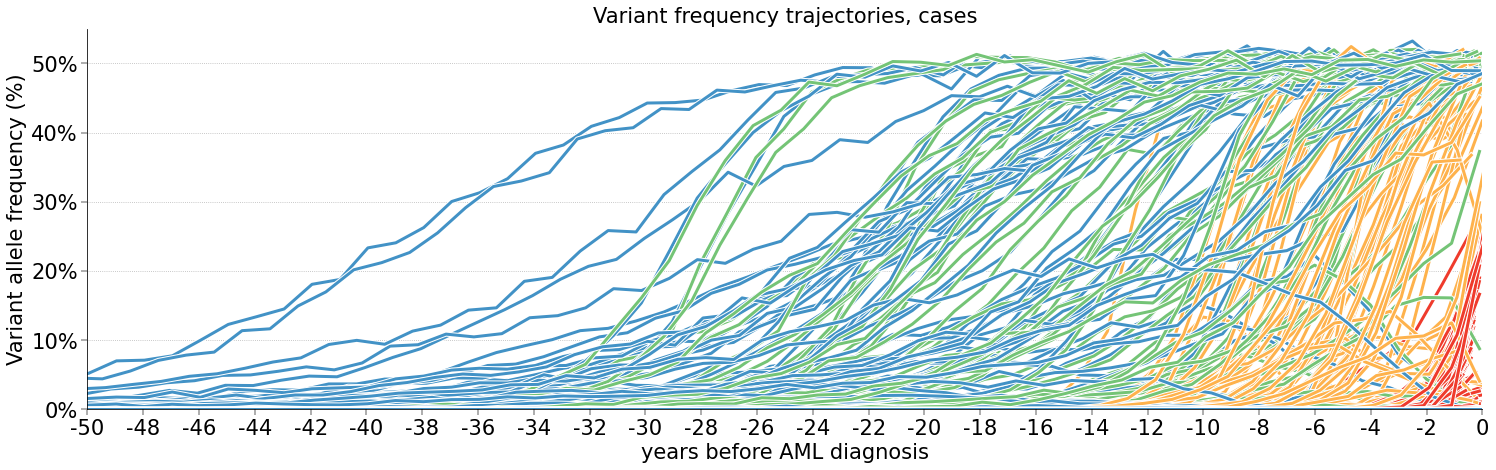

In [321]:
plot_variant_trajectories_preDx(simulated_cases, T, dt, 50, 50)

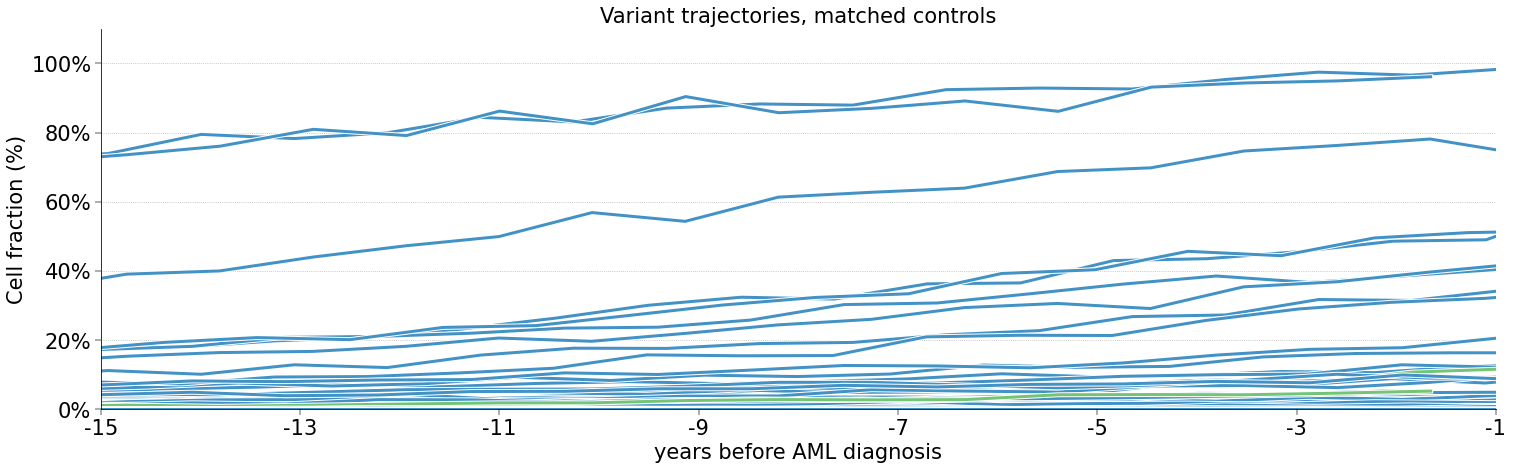

In [20]:
plot_variant_trajectories_matched_controls(simulated_controls, T, dt, dx_ages, 15, 301, 50)

# What fraction of cases have single or doulbe sweep X years before?

- define a "sweep" as >40% VAF or 80% cell fraction. 
- A decade prior to diagnosis: 2/3 of cases have a single mutant sweep, 1/2 have a doulbe mutant sweep

In [9]:
years_pre_dx=15

number_of_dt_in_year=int(1/dt)

single_mutant_sweeps=0
double_mutant_sweeps=0
total_case_count=0

for sim_id, sim_info in simulated_cases.items():

    total_case_count+=1
    
    clones=sim_info['clones']
    dx_time=sim_info['diagnosis_time']

    var_traj=variant_trajectories(clones, T)

    for variant_id, variant_entries in var_traj.items():

        mtraj=variant_entries['mutation_size_trajectory']
        fitness=variant_entries['mutation_fitness']
        mm_number=variant_entries['multiple_mutant_number']
        
        index_pre_dx=int((dx_time-years_pre_dx)*number_of_dt_in_year)
        size_pre_dx=mtraj[index_pre_dx]
        
        if size_pre_dx>0.6 and mm_number==1:
            single_mutant_sweeps+=1
        if size_pre_dx>0.6 and mm_number==2:
            double_mutant_sweeps+=1

print("single mutant sweeps:", single_mutant_sweeps)
print("double mutant sweeps:", double_mutant_sweeps)
print("total cases:", total_case_count)

single mutant sweeps: 60
double mutant sweeps: 42
total cases: 111


<ipython-input-4-d5097957e965>:176: RuntimeWarning: invalid value encountered in true_divide
  mutation_trajectories[mutation_id]['mutation_size_trajectory']=clone_size_trajectory/pop_size_trajectory
<ipython-input-4-d5097957e965>:169: RuntimeWarning: invalid value encountered in true_divide
  new_mutation_trajectory=current_mutation_trajectory+clone_size_trajectory/pop_size_trajectory


# Plot distribution of VAFs through time across cases and control for 50 years preDx

+ Color single, double, triple mutants differently 

i= 0
age= 0


<ipython-input-60-d64169eeb5a1>:177: RuntimeWarning: invalid value encountered in true_divide
  mutation_trajectories[mutation_id]['mutation_size_trajectory']=clone_size_trajectory/pop_size_trajectory
<ipython-input-60-d64169eeb5a1>:170: RuntimeWarning: invalid value encountered in true_divide
  new_mutation_trajectory=current_mutation_trajectory+clone_size_trajectory/pop_size_trajectory


j= 0
j= 1
j= 2
i= 1
age= 20
j= 0
j= 1
j= 2
i= 2
age= 40
j= 0
j= 1
j= 2
i= 3
age= 60
j= 0
j= 1
j= 2
i= 4
age= 80
j= 0
j= 1
j= 2


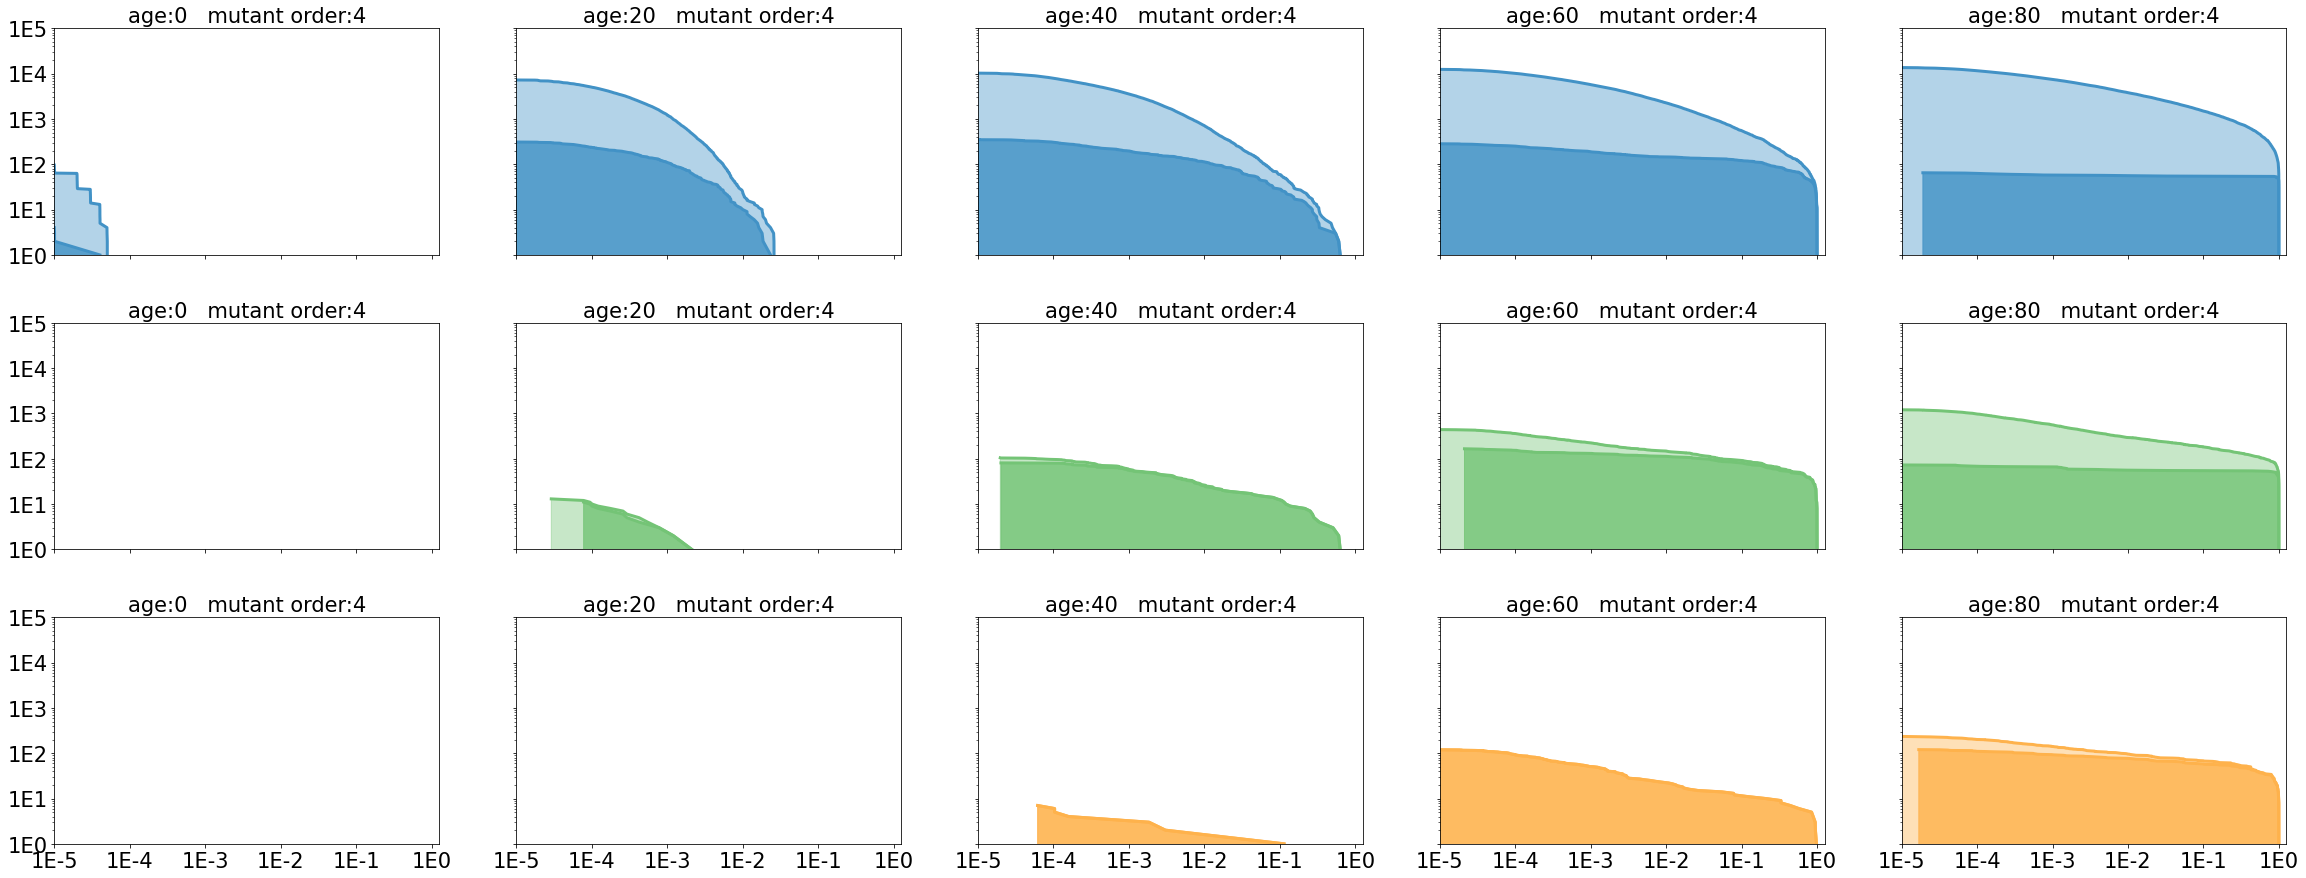

In [299]:
ages_for_histogram=[0,20,40,60,80]

plt.close('all')
fig, ax = plt.subplots(3, 5, figsize = (40, 15), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)

for i, age in enumerate(ages_for_histogram):
    
    print("i=", i)
    print("age=", age)
    all_variants=[[],[],[],[]]
    case_variants=[[],[],[],[]]

    for sim_id, sim_info in simulated_controls.items():

    #     print()
    #     print('sim_id', sim_id)
        clones=sim_info['clones']

        var_traj=variant_trajectories(clones, T)

        for variant_id, variant_entries in var_traj.items():

            mtraj=variant_entries['mutation_size_trajectory']

            f=mtraj[int(age*(1.0/dt))]
    #         print("VAF=", f)

            fitness=variant_entries['mutation_fitness']
    #         print("fitness=", fitness)

            mm_number=variant_entries['multiple_mutant_number']
    #         print("mm_number=", mm_number)
            if f>0.0:
                log_freq=np.log10(f)
                all_variants[mm_number-1].append(log_freq)
    

    for sim_id, sim_info in simulated_cases.items():

    #     print()
    #     print('sim_id', sim_id)
        clones=sim_info['clones']

        var_traj=variant_trajectories(clones, T)

        for variant_id, variant_entries in var_traj.items():

            mtraj=variant_entries['mutation_size_trajectory']

            f=mtraj[int(age*(1.0/dt))]
    #         print("VAF=", f)

            fitness=variant_entries['mutation_fitness']
    #         print("fitness=", fitness)

            mm_number=variant_entries['multiple_mutant_number']
    #         print("mm_number=", mm_number)
            if f>0.0:
                log_freq=np.log10(f)
                all_variants[mm_number-1].append(log_freq)
                case_variants[mm_number-1].append(log_freq)
                
    
    for j in range(3):
        
        print("j=", j)

        # Step 1: Sort the dataset in descending order
        sorted_data_all = np.sort(all_variants[j])[::-1]
        sorted_data_cases = np.sort(case_variants[j])[::-1]

        # Step 2: Calculate the reverse cumulative sum
        cumulative_counts_all = np.arange(1, len(all_variants[j]) + 1)
        cumulative_counts_cases = np.arange(1, len(case_variants[j]) + 1)

        # Step 3: Plot the result
        col=np.random.choice(multiple_mutant_colors[j+1])

        
        ax1=ax[j][i]
        ax1.plot(sorted_data_all, cumulative_counts_all, lw=3, color=col)
        ax1.fill_between(sorted_data_all, cumulative_counts_all, color=col, alpha=0.4)
        
        ax1.plot(sorted_data_cases, cumulative_counts_cases, lw=3, color=col)
        ax1.fill_between(sorted_data_cases, cumulative_counts_cases, color=col, alpha=0.8)
        
        #format plot
        ax1.set_yscale('log')
        ax1.set_ylim(1, 100000)
        ax1.set_xlim(-5, 0.1)
        y_major_ticks = [1, 10, 100, 1000, 10000, 100000]
        y_major_tick_labels = [ "1E0", "1E1", "1E2", "1E3", "1E4", "1E5"]
        x_major_ticks = [-5, -4, -3, -2, -1, 0]
        x_major_tick_labels = [ "1E-5", "1E-4", "1E-3", "1E-2", "1E-1", "1E0"]


        ax1.set_yticks(y_major_ticks)
        ax1.set_yticklabels(y_major_tick_labels, fontsize = 21)
        ax1.set_xticks(x_major_ticks)
        ax1.set_xticklabels(x_major_tick_labels, fontsize = 21)
        ax1.set_title('age:'+str(age)+"   mutant order:"+str(mm_number), fontsize = 21)
        


plt.show()







# Joint frequency distribution as way of identifying early large double mutants

+ Plot scatter of largest and second largest mutation 
+ Clones which are enriched for being preleaukaemic should be enriched along the diagonal

i= 0
age= 40


<ipython-input-4-d5097957e965>:176: RuntimeWarning: invalid value encountered in true_divide
  mutation_trajectories[mutation_id]['mutation_size_trajectory']=clone_size_trajectory/pop_size_trajectory
<ipython-input-4-d5097957e965>:169: RuntimeWarning: invalid value encountered in true_divide
  new_mutation_trajectory=current_mutation_trajectory+clone_size_trajectory/pop_size_trajectory


controls counter:  0
future cases counter:  1
i= 1
age= 50
controls counter:  0
future cases counter:  11
i= 2
age= 60
controls counter:  15
future cases counter:  46
i= 3
age= 70
controls counter:  91
future cases counter:  86


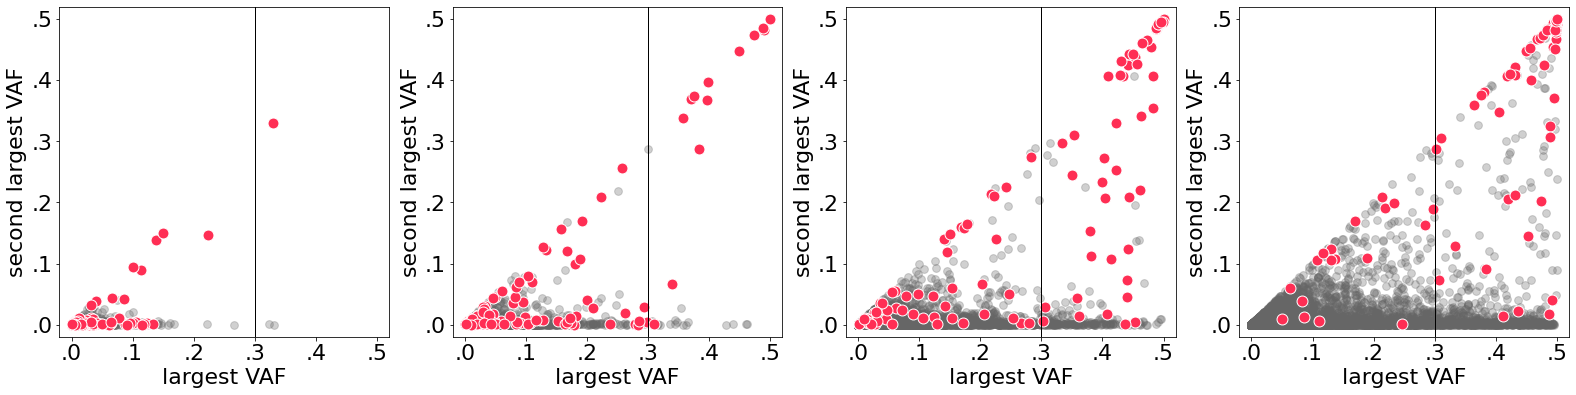

In [11]:
ages_for_histogram=[40,50,60,70]
width=int(5.5*len(ages_for_histogram))
plt.close('all')
fig, ax = plt.subplots(1, len(ages_for_histogram), figsize = (width, 5.5), sharex=True, sharey=False)
plt.subplots_adjust(hspace=0.3)

for i, age in enumerate(ages_for_histogram):
    
    controls_counter=0
    future_cases_counter=0
    
    print("i=", i)
    print("age=", age)
    control_largest=[]
    control_second=[]
    case_largest=[]
    case_second=[]

    for sim_id, sim_info in simulated_controls.items():

#         print()
#         print('sim_id', sim_id)
        clones=sim_info['clones']

        var_traj=variant_trajectories(clones, T)
        variants_in_person=[]
        
        for variant_id, variant_entries in var_traj.items():

            mtraj=variant_entries['mutation_size_trajectory']

            f=mtraj[int(age*(1.0/dt))]
    #         print("VAF=", f)

            fitness=variant_entries['mutation_fitness']
    #         print("fitness=", fitness)

            mm_number=variant_entries['multiple_mutant_number']
        
            
    #         print("mm_number=", mm_number)
            if f>0.0:
                log_freq=0.5*f
#                 log_freq=np.log10(f/(1-f))
                variants_in_person.append(log_freq)
            
            variants_in_person.sort(reverse=True)

            
        if len(variants_in_person)>0:
            top_variant=variants_in_person[0]
            if len(variants_in_person)>1:
                second_variant=variants_in_person[1]
            else:
#                 second_variant=-7+np.random.random()
                second_variant=0.0

            control_largest.append(top_variant)
            control_second.append(second_variant)

        # count control numbers that would be pass this criteria
        if top_variant>0.3 and second_variant>0.1:
            controls_counter+=1
            
    for sim_id, sim_info in simulated_cases.items():

#         print()
#         print('sim_id', sim_id)
        clones=sim_info['clones']

        var_traj=variant_trajectories(clones, T)
        variants_in_person=[]
        for variant_id, variant_entries in var_traj.items():

#             print("variant_id = ", variant_id)
            
            mtraj=variant_entries['mutation_size_trajectory']

            f=mtraj[int(age*(1.0/dt))]
#             print("VAF=", f)

            fitness=variant_entries['mutation_fitness']
#             print("fitness=", fitness)

            mm_number=variant_entries['multiple_mutant_number']
#             print("mm_number=", mm_number)
            

            if f>0.0:
                log_freq=0.5*f
#                 log_freq=np.log10(f/(1-f))
                variants_in_person.append(log_freq)
            
            variants_in_person.sort(reverse=True)
            
        if len(variants_in_person)>0:
#                 print('sorted_vafs = ', variants_in_person)
            top_variant=variants_in_person[0]
            if len(variants_in_person)>1:
                second_variant=variants_in_person[1]
            else:
#                 second_variant=-7+np.random.random()
                second_variant=0.0

            case_largest.append(top_variant)
            case_second.append(second_variant)
            
        # count furture case numbers that would be assumed germline
        if top_variant>0.3 and second_variant>0.1:
            future_cases_counter+=1
                           


    
    
    ax1=ax[i]
    ax1.scatter(control_largest, control_second, color=(0.4, 0.4, 0.4), alpha=0.3, s=60)
    ax1.scatter(case_largest, case_second, color=c1, alpha=1, s=120, edgecolors='w', linewidths=1.)
    ax1.plot([0.3,0.3], [-0.02, 0.52], color='k', alpha=1, linewidth=1.)

    print("controls counter: ",controls_counter)
    print("future cases counter: ", future_cases_counter)
#     #format plot
#     ax1.set_xlim(-5, 5)
#     ax1.set_ylim(-5, 5)

#     x_major_ticks = [-4, -2, 0, 2, 4]
#     x_major_tick_labels = ["0.01%", "1%", "50%", "99%", "99.99%"]
    
#     y_major_ticks = [-4, -2, 0, 2, 4]
#     y_major_tick_labels = ["0.01%", "1%", "50%", "99%", "99.99%"]

#     ax1.set_xticks(x_major_ticks)
#     ax1.set_xticklabels(x_major_tick_labels, fontsize = 18)
    
#     ax1.set_yticks(y_major_ticks)
#     ax1.set_yticklabels(y_major_tick_labels, fontsize = 18)
    
#     ax1.set_title('age:'+str(age), fontsize = 21)

    #format plot
    ax1.set_xlim(-0.02, .52)
    ax1.set_ylim(-0.02, 0.52)

    x_major_ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    x_major_tick_labels = [".0", ".1", ".2", ".3", ".4", ".5"]
    
    y_major_ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    y_major_tick_labels = [".0", ".1", ".2", ".3", ".4", ".5"]

    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = 22)
    
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = 22)
    
    ax1.set_xlabel('largest VAF', fontsize = 22)
    ax1.set_ylabel('second largest VAF', fontsize = 22)
#     ax1.set_title('age:'+str(age), fontsize = 22)
    
    ax1.set_aspect('equal')

plt.tight_layout()
plt.show()

with PdfPages('joint_frequency_plot_sims.pdf') as pdf:
    pdf.savefig(fig)
plt.close(fig)


# Occurence time distributions

+ First get inferred occurence times of mutations broken down by number of drivers
+ Then compare to distributions expected from the model

In [210]:
# Step 2: Reading the JSON file back into a dictionary
with open('acquisition_age_preAML.json', 'r') as file:
    acquisition_ages = json.load(file)

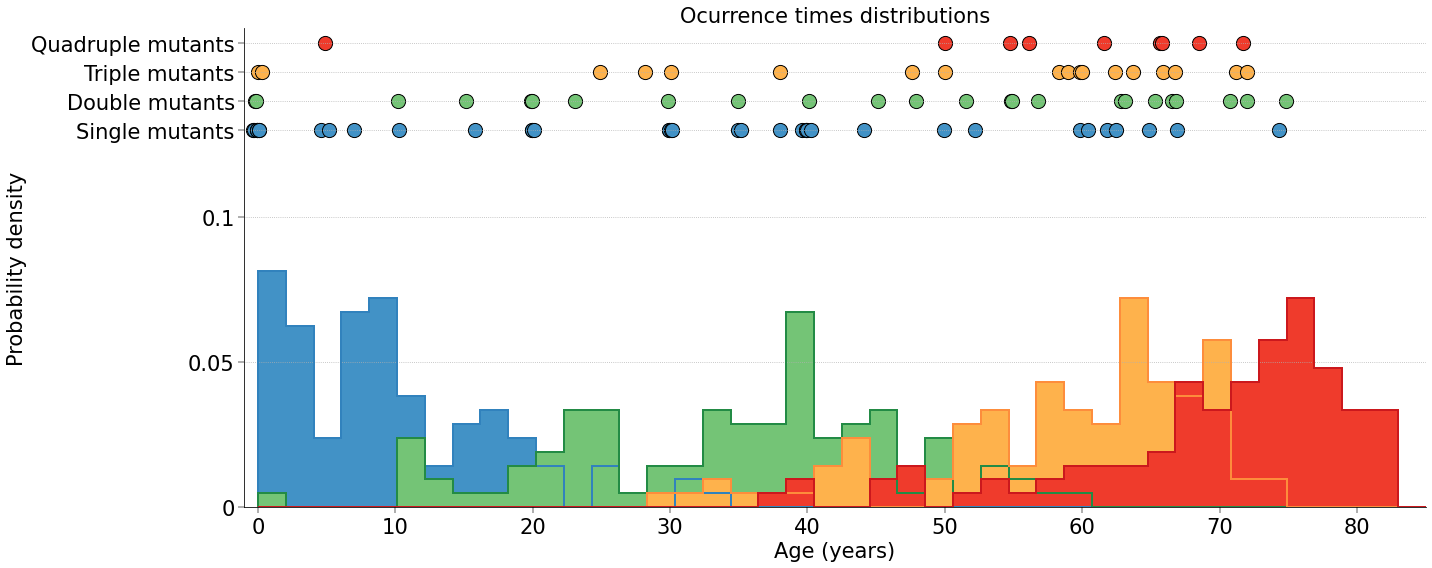

In [211]:
mut_color_dict_dark={1:b0, 2:g0, 3:y0, 4:r0}
mut_color_dict={1:b1, 2:g1, 3:y1, 4:r1, 5:r0, 6:r0}

fitness_occurence_times=main_branch_fitnesses_times(simulated_cases)
occurence_times=np.array(fitness_occurence_times['occurence_times'])


plt.close('all')
fig, ax1 = plt.subplots(1, 1, figsize = (20, 8))
plt.subplots_adjust(hspace=0.3)


#format plot
ax1.set_xlim(-1, T*dt)
ax1.set_ylim(0, 0.165)
cc=0
for times in occurence_times:
    cc+=1
    plt.hist(times, bins=np.linspace(0, 85, 43), density=True, alpha=1.0, facecolor=mut_color_dict[cc])
    plt.hist(times, bins=np.linspace(0, 85, 43), density=True, histtype='step', edgecolor=mut_color_dict_dark[cc], linewidth=2)

for i, mut_ages in acquisition_ages.items():
    k=eval(i)
    y_vals=np.array([0.12+0.01*k for i in range(len(mut_ages))])
    plt.scatter(mut_ages, y_vals, s=200, c=mut_color_dict[k], edgecolor='k', lw=1)

x_major_ticks = [0, 10, 20, 30, 40,50, 60, 70, 80]
x_major_tick_labels = [ "0", "10", "20", "30", "40", "50", "60", "70", "80"]

y_major_ticks = [0, 0.05, 0.1, 0.13, 0.14, 0.15, 0.16]
y_major_tick_labels = [ "0", "0.05", "0.1", "Single mutants", "Double mutants", "Triple mutants", "Quadruple mutants"]

ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = 21)

ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = 21)

ax1.set_title('Ocurrence times distributions', fontsize = 21)
ax1.set_xlabel('Age (years)', fontsize = 21)
ax1.set_ylabel('Probability density', fontsize = 21)


ax1.grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.set_tick_params(width=1.5, color = grey3, length = 6)
ax1.xaxis.set_tick_params(width=1.5, color = grey3, length = 6)

plt.tight_layout()
# plt.savefig('acquisition_time_distributions.pdf')

plt.show()



# Categorizing dynamics for highlighting interesting types of behaviour

+ Initially consider 2 mutually exclusive categories (linear, branched)
+ Branched is defined by presence of at least one clone on a side-branch that gets >10% cell fraction  (rather than the main branch)
+ Within linear consider two mutually exclusive categories: A. cases whose waiting time between single, double and triple mutants are typical (occur within the 90% confience interval of the median). B cases with anomalously early or late occurence times
+ Within Branched, consider A. branching only at single-mutant stage, B. multiple-mutant stage, or single and multiple branches.

In [257]:
def waiting_time_distributions(sim_cases):

    fitness_occurence_times=main_branch_fitnesses_times(sim_cases)
    occurence_times=np.array(fitness_occurence_times['occurence_times'])

    waiting_times_1st_mut=occurence_times[0]
    waiting_times_2nd_mut=occurence_times[1]-occurence_times[0]
    waiting_times_3rd_mut=occurence_times[2]-occurence_times[1]
    waiting_times_4th_mut=occurence_times[3]-occurence_times[2]

    waiting_times_1st_mut.sort()
    waiting_times_2nd_mut.sort()
    waiting_times_3rd_mut.sort()
    waiting_times_4th_mut.sort()

    return [waiting_times_1st_mut, waiting_times_2nd_mut, waiting_times_3rd_mut, waiting_times_4th_mut]

In [1]:
category_dict={'linear_all':[], 'linear_standard':[], \
               'linear_anomalous_single':[], 'linear_anomalous_double':[], \
               'linear_anomalous_triple':[], 'linear_anomalous_quadruple':[], \
               'branched_all':[], 'branched_single':[], 'branched_double':[], 'branched_triple':[], 'branched_multiple':[]}
wait_time_dists=waiting_time_distributions(simulated_cases)

cc=0
clone_freq_threshold=0.1

with PdfPages('all_simulated_cases.pdf') as pdf:

    for sim_id, sim_info in simulated_cases.items():
        cc+=1
        print()
        print('sim_id', sim_id)
        clones=sim_info['clones']

        dx_time=sim_info['diagnosis_time']
        print('Dx time = ', dx_time)

        main_branch_clones=[]
        for clone_id, clone_info in clones.items():
    #         print('clone:', clone_id)

            mutations=clone_info['mutations']
            driver_number=len(mutations)
            if driver_number==4 and clone_info['aml_clone']:
#                 print(mutations)
                for m_id, s in mutations.items():
                    main_branch_clones.append(m_id)

        pop_size_traj=population_size_trajectory(clones, T)
        pop_size_traj=pop_size_traj+0.1 #avoid division by zero when AML emerges and population ceases to exsit
    #     print(pop_size_traj)

        branched_at_single_mutant_level=0
        branched_at_double_mutant_level=0
        branched_at_triple_mutant_level=0

        for clone_id, clone_info in clones.items():
#             print('clone:', clone_id)

            mutations=clone_info['mutations']

            driver_number=len(mutations)

            frequency_trajectory_of_clone=clone_info['clone_size_trajectory']/pop_size_traj
            max_freq_clone=np.max(frequency_trajectory_of_clone)


            if max_freq_clone>clone_freq_threshold and (clone_id not in main_branch_clones) and driver_number>0:
#                 print('Branch DETECTED')
#                 print('max_clone_frequency =', max_freq_clone)
#                 print('mutations', mutations)

                if driver_number==1:
                    branched_at_single_mutant_level=1
                if driver_number==2:
                    branched_at_double_mutant_level=1
                if driver_number==3:
                    branched_at_triple_mutant_level=1

        branching_vector=[branched_at_single_mutant_level, branched_at_double_mutant_level, branched_at_triple_mutant_level]
#         print('branching_vector', branching_vector)        
        if branching_vector==[1, 0, 0]:
            category_dict['branched_single'].append(sim_id)
        elif branching_vector==[0, 1, 0]:
            category_dict['branched_double'].append(sim_id)
        elif branching_vector==[0, 0, 1]:
            category_dict['branched_triple'].append(sim_id)
        elif branching_vector==[1, 1, 0] or branching_vector==[1, 0, 1] or branching_vector==[0, 1, 1] or branching_vector==[1, 1, 1]:
            category_dict['branched_multiple'].append(sim_id)
        if branching_vector!=[0,0,0]:
            category_dict['branched_all'].append(sim_id)
            print('BRANCHED')
            print("branching vector = ", branching_vector)

        if branching_vector==[0,0,0]:
            print('LINEAR')
            category_dict['linear_all'].append(sim_id)
            linear_anomaly_vector=[0, 0, 0, 0]
            for k, main_branch_clone in enumerate(main_branch_clones):
                occurence_time=clones[main_branch_clone]['occurence_time']
#                 print('clone_id', main_branch_clone)
#                 print('ocurrence_time', occurence_time)

                if k==0:
                    waiting_times=wait_time_dists[0]
                    occurence_time_single=occurence_time
                    waiting_time=occurence_time_single
                    rank = bisect.bisect_left(waiting_times, waiting_time)
                    centile=rank/len(waiting_times)
                    if centile<0.05 or centile>0.95:
                        category_dict['linear_anomalous_single'].append(sim_id)
                        linear_anomaly_vector[0]=1
                elif k==1:
                    waiting_times=wait_time_dists[1]
                    occurence_time_double=occurence_time
                    waiting_time=occurence_time_double-occurence_time_single
                    rank = bisect.bisect_left(waiting_times, waiting_time)
                    centile=rank/len(waiting_times)
                    if centile<0.05 or centile>0.95:
                        category_dict['linear_anomalous_double'].append(sim_id)   
                        linear_anomaly_vector[1]=1
                elif k==2:
                    waiting_times=wait_time_dists[2]
                    occurence_time_triple=occurence_time
                    waiting_time=occurence_time_triple-occurence_time_double
                    rank = bisect.bisect_left(waiting_times, waiting_time)
                    centile=rank/len(waiting_times)
                    if centile<0.05 or centile>0.95:
                        category_dict['linear_anomalous_triple'].append(sim_id)
                        linear_anomaly_vector[2]=1
                elif k==3:
                    waiting_times=wait_time_dists[3]
                    occurence_time_quadruple=occurence_time
                    waiting_time=occurence_time_quadruple-occurence_time_triple
                    rank = bisect.bisect_left(waiting_times, waiting_time)
                    centile=rank/len(waiting_times)
                    if centile<0.05 or centile>0.95:
                        category_dict['linear_anomalous_quadruple'].append(sim_id)
                        linear_anomaly_vector[3]=1

            if linear_anomaly_vector==[0,0,0,0]:
                category_dict['linear_standard'].append(sim_id) 

            print("linear_anomaly_vector", linear_anomaly_vector)


        var_traj=variant_trajectories(clones, T)

        fig1=plot_clone_trajectories(clones, T, dt, sim_id)
        fig2=plot_variant_trajectories(var_traj, T, dt, sim_id)
        fig3=plot_muller(clones, T, sim_id, dx_time)

        # Save each figure to the PDF
        pdf.savefig(fig1)
        pdf.savefig(fig2)
        pdf.savefig(fig3)

        # Close the figures to free up memory
        plt.close(fig1)
        plt.close(fig2)
        plt.close(fig3) 





In [262]:
print('number of clonal interference sims:', len(category_dict['branched_all']))
print('number of linear sims:', len(category_dict['linear_all']))

number of clonal interference sims: 37
number of linear sims: 95


# Epidimiological AML info

+ Age incidence curve from CRUK website: men and women

In [263]:
ages=np.linspace(2.5, 82.5, 17)
age_incidence_males=np.array([1.1, 0.4, 0.6, 0.7, 1.0, 0.9, 1.2, 1.3, 1.6, 2.1, 3.3, 4.8, 7.5, 12.6, 18.2, 26.7, 34.0])
age_incidence_females=np.array([0.9, 0.4, 0.5, 0.7, 0.8, 1.0, 1.3, 1.2, 1.7, 2.1, 2.8, 3.5, 5.5, 7.9, 10.9, 13.6, 20.4])
age_incidence_combined=0.5*(age_incidence_males+age_incidence_females)

In [264]:
final_age=85
delta_age=5
# simulated_age_incidence=
bins=np.linspace(0, final_age, int(final_age/delta_age)+1)
bin_counts, bin_edges = np.histogram(dx_ages, bins)

adjusted_bin_counts = 100000*bin_counts/(delta_age*number_of_sims)


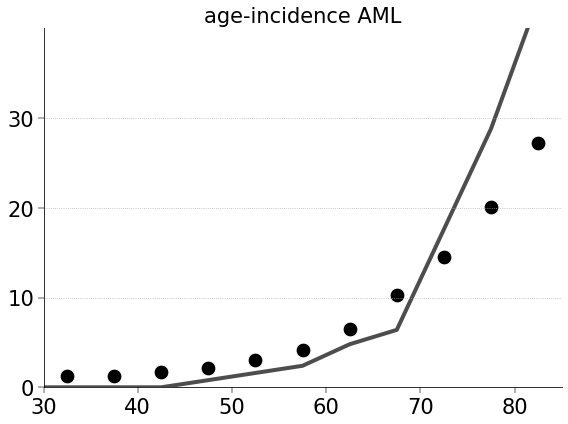

In [266]:
plt.close('all')
fig, ax1 = plt.subplots(1, 1, figsize = (8, 6))
plt.subplots_adjust(hspace=0.3)


# ax1.plot(ages, age_incidence_males,linewidth=5, color=c0) #plot line 
# ax1.plot(ages, age_incidence_females,linewidth=5, color=c0) #plot line 
ax1.plot(ages, adjusted_bin_counts, color=(0.3,0.3,0.3), linewidth=4, zorder=0) #plot line
ax1.scatter(ages, age_incidence_combined,color='k', s=220, edgecolors='white') #plot line 
# ax1.scatter(ages, adjusted_bin_counts, color=red3) #plot line  


#format plot
# ax1.set_yscale('log')
ax1.set_xlim(30, 85)
ax1.set_ylim(0, 40)

y_major_ticks = [0, 10, 20, 30]
y_major_tick_labels = [ "0", "10", "20", "30"]

x_major_ticks = [30, 40, 50, 60, 70, 80]
x_major_tick_labels = ["30", "40", "50", "60", "70", "80"]

ax1.set_yticks(y_major_ticks)
# ax1.set_yscale("log")
ax1.set_yticklabels(y_major_tick_labels, fontsize = 21)
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = 21)
ax1.set_title('age-incidence AML', fontsize = 21)


ax1.grid(axis = 'y', which = 'both', zorder = 0, linestyle = ':')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.set_tick_params(width=1.5, color = grey3, length = 6)
ax1.xaxis.set_tick_params(width=1.5, color = grey3, length = 6)

plt.tight_layout()
# plt.savefig('age_incidence_comparison.pdf')

plt.show()